In [1]:
import numpy as np
import matplotlib.pyplot as plt


In [2]:
study_hours = np.array([1, 2, 2.5, 3, 4, 4.5, 5, 5.5, 6, 7, 8, 9])
pass_fail = np.array([0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1])  # 0=fail, 1=pass


In [ ]:
class LogisticRegression:
    def __init__(self,learning_rate=0.01,max_iterations=1000):
        self.learning_rate=learning_rate
        self.max_iterations=max_iterations
        self.weights=None
        self.bias=None
        self.costs=[]
    
    
    def sigmoid(self,z):
        "sigmoid activation function"
        z=np.clip(z,-500,500)
        return 1/(1+np.exp(-z))
    
    
    def fit(self,x,y):
        "train the LR"
        n_samples,n_features=x.shape
        self.weights=np.zeros(n_features)
        self.bias=0
        
        for i in range(self.max_iterations):
            linear_model=np.dot(x,self.weights)+self.bias
            y_predicted=self.sigmoid(linear_model)
            cost=self.compute_cost(y,y_predicted)
            self.costs.append(cost)
            
            dw=(1/n_samples)* np.dot(X.T,(y_predicted-y))
            db=(1/n_samples)* np.sum(y_predicted-y)
            
            self.weights-=self.learning_rate*dw #gradient descent formula
            self.bias-=self.learning_rate*db
            
            
    def compute_cost(self,y_true,y_pred):
        "lr cost function"
        epsilon=1e-15
        y_pred=np.clip(y_pred,epsilon,1-epsilon)
        
        cost=-np.mean(y_true*np.log(y_pred) + (1-y_true)*np.log(1-y_pred))
        return cost
    
    def predict(self,x):
        "predictions"
        linear_model=np.dot(x,self.weights)+self.bias
        y_predicted=self.sigmoid(linear_model)
        predictions =[1 if i>0.5 else 0 for i in y_predicted]
        return np.array(predictions) , y_predicted
    
        

In [8]:
X = study_hours.reshape(-1, 1)  # Reshape for matrix operations
y = pass_fail

model = LogisticRegression(learning_rate=0.1, max_iterations=1000)
model.fit(X, y)

predictions, probabilities = model.predict(X)


LOGISTIC REGRESSION EXPLAINED:

1. SIGMOID FUNCTION:
   σ(z) = 1 / (1 + e^(-z))
   - Maps any real number to (0,1)
   - z = wx + b (linear combination)
   - Output is probability of class 1

2. DECISION BOUNDARY:
   - If σ(z) > 0.5 → Predict class 1
   - If σ(z) ≤ 0.5 → Predict class 0
   - Boundary occurs when z = 0 (σ(0) = 0.5)

3. COST FUNCTION (Log-Likelihood):
   Cost = -[y*log(p) + (1-y)*log(1-p)]
   - Penalizes wrong predictions heavily
   - No closed-form solution → use gradient descent

4. GRADIENT DESCENT:
   - Update: w = w - α * ∂Cost/∂w
   - Update: b = b - α * ∂Cost/∂b
   - α = learning rate

5. YOUR MODEL:
   Equation: P(pass) = σ(1.125 * hours + -5.122)
   Decision boundary: 4.55 study hours


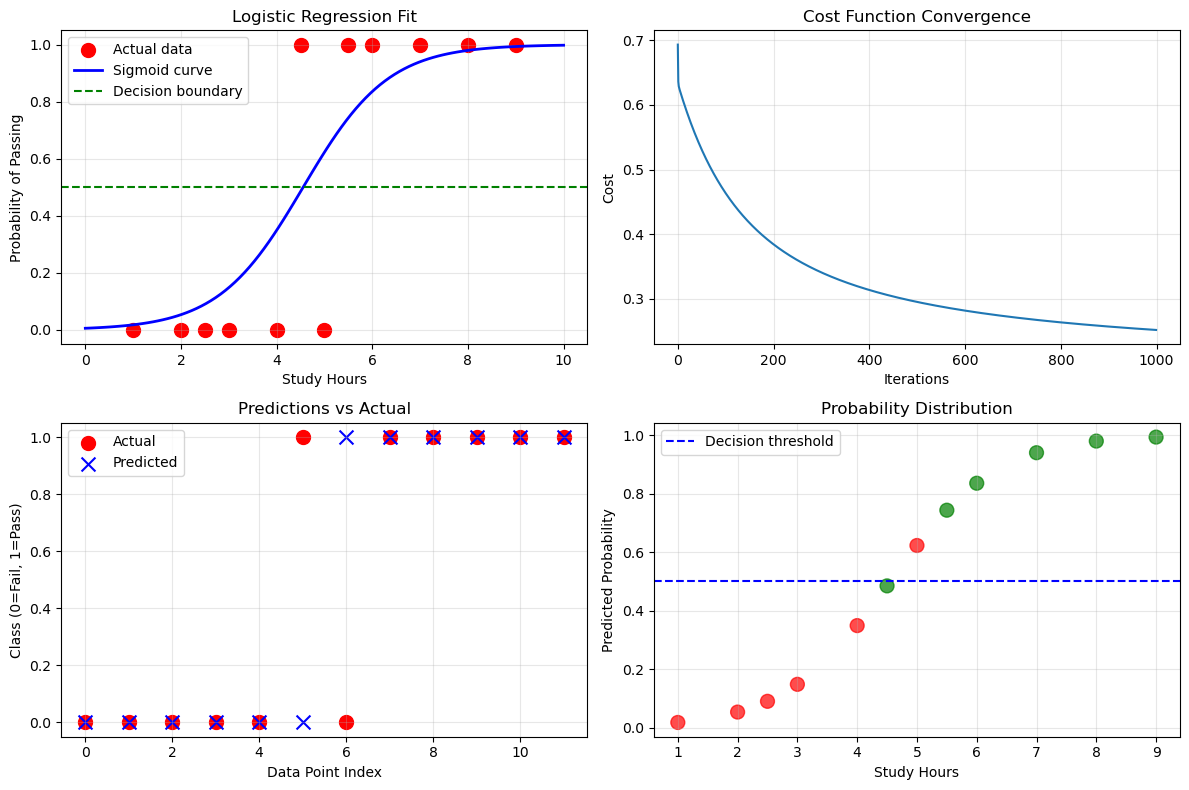


KEY DIFFERENCES FROM LINEAR REGRESSION:
1. OUTPUT: Probabilities (0-1) instead of continuous values
2. FUNCTION: Sigmoid instead of straight line
3. COST: Log-likelihood instead of squared error
4. OPTIMIZATION: Gradient descent (no closed form)
5. PURPOSE: Classification instead of regression


In [9]:

print("\n" + "="*60)
print("LOGISTIC REGRESSION EXPLAINED:")
print("="*60)

print("\n1. SIGMOID FUNCTION:")
print("   σ(z) = 1 / (1 + e^(-z))")
print("   - Maps any real number to (0,1)")
print("   - z = wx + b (linear combination)")
print("   - Output is probability of class 1")

print("\n2. DECISION BOUNDARY:")
print("   - If σ(z) > 0.5 → Predict class 1")
print("   - If σ(z) ≤ 0.5 → Predict class 0")
print("   - Boundary occurs when z = 0 (σ(0) = 0.5)")

print("\n3. COST FUNCTION (Log-Likelihood):")
print("   Cost = -[y*log(p) + (1-y)*log(1-p)]")
print("   - Penalizes wrong predictions heavily")
print("   - No closed-form solution → use gradient descent")

print("\n4. GRADIENT DESCENT:")
print("   - Update: w = w - α * ∂Cost/∂w")
print("   - Update: b = b - α * ∂Cost/∂b")
print("   - α = learning rate")

print(f"\n5. YOUR MODEL:")
print(f"   Equation: P(pass) = σ({model.weights[0]:.3f} * hours + {model.bias:.3f})")
print(f"   Decision boundary: {-model.bias/model.weights[0]:.2f} study hours")

# Plot the results
plt.figure(figsize=(12, 8))

# Plot 1: Data and sigmoid curve
plt.subplot(2, 2, 1)
plt.scatter(study_hours, pass_fail, color='red', label='Actual data', s=100)
x_plot = np.linspace(0, 10, 100).reshape(-1, 1)
_, prob_plot = model.predict(x_plot)
plt.plot(x_plot, prob_plot, 'b-', label='Sigmoid curve', linewidth=2)
plt.axhline(y=0.5, color='green', linestyle='--', label='Decision boundary')
plt.xlabel('Study Hours')
plt.ylabel('Probability of Passing')
plt.title('Logistic Regression Fit')
plt.legend()
plt.grid(True, alpha=0.3)

# Plot 2: Cost function over iterations
plt.subplot(2, 2, 2)
plt.plot(model.costs)
plt.xlabel('Iterations')
plt.ylabel('Cost')
plt.title('Cost Function Convergence')
plt.grid(True, alpha=0.3)

# Plot 3: Predictions vs Actual
plt.subplot(2, 2, 3)
plt.scatter(range(len(study_hours)), pass_fail, color='red', label='Actual', s=100)
plt.scatter(range(len(study_hours)), predictions, color='blue', marker='x', s=100, label='Predicted')
plt.xlabel('Data Point Index')
plt.ylabel('Class (0=Fail, 1=Pass)')
plt.title('Predictions vs Actual')
plt.legend()
plt.grid(True, alpha=0.3)

# Plot 4: Probability distribution
plt.subplot(2, 2, 4)
colors = ['red' if actual == 0 else 'green' for actual in pass_fail]
plt.scatter(study_hours, probabilities, c=colors, s=100, alpha=0.7)
plt.axhline(y=0.5, color='blue', linestyle='--', label='Decision threshold')
plt.xlabel('Study Hours')
plt.ylabel('Predicted Probability')
plt.title('Probability Distribution')
plt.legend()
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

print("\n" + "="*60)
print("KEY DIFFERENCES FROM LINEAR REGRESSION:")
print("="*60)
print("1. OUTPUT: Probabilities (0-1) instead of continuous values")
print("2. FUNCTION: Sigmoid instead of straight line")
print("3. COST: Log-likelihood instead of squared error")
print("4. OPTIMIZATION: Gradient descent (no closed form)")
print("5. PURPOSE: Classification instead of regression")

In [ ]:
# Log-Odds: Converts probability problem into linear equation

# Allows any real number input
# Sigmoid converts back to 0-1 probability


# Best Fit: Uses gradient descent to minimize log-likelihood cost

# No direct formula like linear regression
# Iteratively improves weights


# R² Alternative: Pseudo R² or accuracy metrics

# Measures classification improvement
# Different interpretation than linear R²